# Saliency Map | EPOCH Lab: Ricoh

A saliency map is a way to measure the spatial support of a particular class in each image. It is the oldest and most frequently used explanation method for interpreting the predictions of convolutional neural networks. The saliency map is built using gradients of the output over the input.

In [1]:
%pylab inline

from PIL import Image
import torch
from torchvision import models, transforms

Populating the interactive namespace from numpy and matplotlib


In [2]:
print("CUDA Available: ", torch.cuda.is_available())
device = torch.device("cuda" if (torch.cuda.is_available()) else "cpu")

CUDA Available:  False


In [3]:
model = models.inception_v3(pretrained=True).to(device)
# model = models.resnet50(pretrained=True).to(device)
model.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [4]:
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                ])

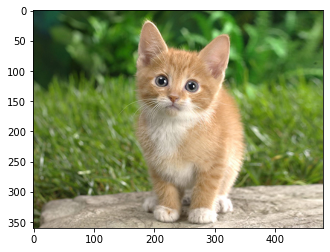

In [5]:
img = Image.open("/Volumes/artemis/library/datasets/cat.jpg")
plt.imshow(img)

In [6]:
input_tensor = preprocess(img).unsqueeze(0)
print(input_tensor.shape)

torch.Size([1, 3, 256, 341])


In [7]:
def saliency(image):
    image = image.to(device)
    
    image.requires_grad = True
    
    output = model(image)
  
    idx = output.argmax()
    cost = output[0, idx]
    
    cost.backward()
    
    slc, _ = torch.max(torch.abs(image.grad[0]), dim=0)
    return slc

In [8]:
slc = saliency(input_tensor)
slc *= 1/slc.max()

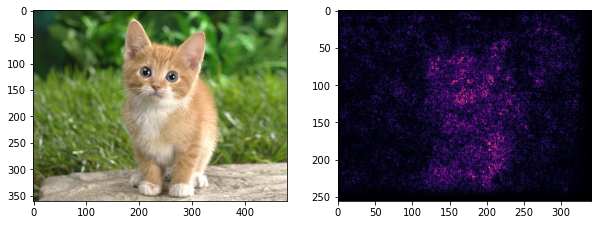

In [9]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(slc.squeeze(), cmap=plt.cm.inferno)
plt.show()